# Dynamic Programming

Exploring the art of solving subproblems and finding relationships to connect them to solve bigger problems.

The idea focuses on **memoization**. Let's take a linear programming approach as an example:

In [1]:
def fib_linear(n: int) -> int:
    if n < 0:
        print("Outside bounds")
    elif n == 1:
        return 0
    elif n == 2:
        return 1
    else:
        return fib_linear(n-1) + fib_linear(n-2)

Notice how this method uses simple recursion but repeats values until the result is achived. We can actually simplify this implementation by storing the results in a list, like so:

In [2]:
fib_seq = [0, 1]

def fibonacci(n):
    if n < 0:
        print("Outside bounds")
    elif n <= len(fib_seq):
        return fib_seq[n-1]
    else:
        fib_n = fibonacci(n-1) + fibonacci(n-2)
        fib_seq.append(fib_n)
        return fib_n

In [3]:
fibonacci(9)

21

In [4]:
print(fib_seq)

[0, 1, 1, 2, 3, 5, 8, 13, 21]


Now, we save the fibonacci result for every value and only add new ones when needed. Multiple iterations of values that have already computed are now `O(1)` time because they are just direct lookups of the values in the array.

This is dynamic programming at it's finest!

## Policy Iteration

We can apply these principles to Reinforcement Learning (RL) by considering a few techniques. Our first being *policy iteration*.

To determine the best policy, we need a method to evaluate the given policy for a state. One method is to evaluate the policy by searching through all of the states of an MDP and then evaluating all the actions available to that state. This gives us a *value function* for the given state that we can then use to perform successive updates to create a new one. 

Here's what our formula looks like:

$$
v_{k+1} = \mathbb{E} \left[R_{t+1} + \gamma v_k(S_{t+1}) | S_t = s \right]
$$

## Iterative Policy Evaluation

DP is a type of planning method that requires full knowledge of the environment (model-based approach). It's typically inefficient for large scale environments, but is great for building intution for our RL problem. 

We'll use a duplicate copy of the `FrozenLake` environment with the dynamics of the environment stored in `env.P`.

Here's the algorithm:

![Policy Evaluation Algorithm](../assets/imgs/policy-eval-algo.png)


In [5]:
import gymnasium as gym
import numpy as np

from frozenlake import FrozenLakeEnv

# env = gym.make("FrozenLake-v1", render_mode="ansi")
env: gym.Env = FrozenLakeEnv(render_mode="ansi")

POLICY = np.ones([env.observation_space.n, env.action_space.n]) / env.action_space.n  # Equal probability across actions

def state_value_function(action_prob: float, prob: float, V: np.ndarray, reward: float, gamma: float, next_state: int) -> np.ndarray:
    return action_prob * prob * (reward + gamma * V[next_state])

def train(env: gym.Env, policy: np.ndarray, gamma: float = 1, theta: float = 1e-8) -> np.ndarray:
    V = np.zeros(env.observation_space.n)  # value-function prediction
    while True:
        delta = 0
        
        for state in range(env.observation_space.n):
            Vs = 0
            
            for action, action_prob in enumerate(policy[state]):
                for prob, next_state, reward, done in env.P[state][action]:
                    Vs += state_value_function(action_prob, prob, V, reward, gamma, next_state)

            delta = max(delta, np.abs(V[state] - Vs))
            V[state] = Vs

        if delta < theta:
            break
    
    return V

In [6]:
V = train(env, POLICY)

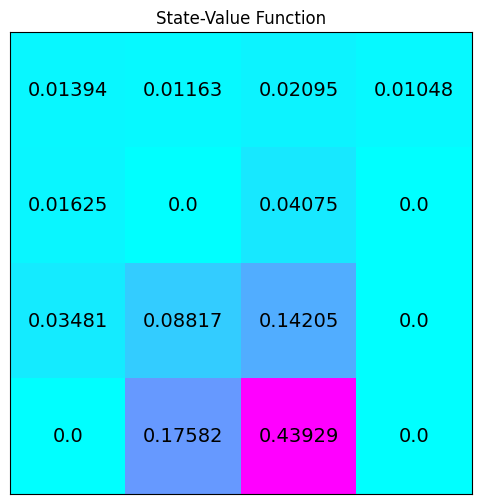

In [9]:
from plot_utils import plot_values

plot_values(V)